<a href="https://colab.research.google.com/github/Ankur479/asset-pricing-valuation-python/blob/main/Asset_Pricing_and_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
stock = 'AAPL'
market = '^GSPC'

In [ ]:
data = yf.download(
    [stock, market],
    start="2020-01-01",
    end=datetime.today().strftime('%Y-%m-%d'),
    auto_adjust=True  # ✅ Automatically adjusts prices for splits/dividends
)[['Close']]
print(data.head())


[*********************100%***********************]  2 of 2 completed

Price           Close             
Ticker           AAPL        ^GSPC
Date                              
2020-01-02  72.538513  3257.850098
2020-01-03  71.833290  3234.850098
2020-01-06  72.405685  3246.280029
2020-01-07  72.065147  3237.179932
2020-01-08  73.224419  3253.050049


In [ ]:
returns = data.pct_change().dropna()               # → Compute daily percentage change in price
returns.columns = ['Stock', 'Market']              # → Rename columns for clarity
print(returns.head())

               Stock    Market
Date                          
2020-01-03 -0.009722 -0.007060
2020-01-06  0.007968  0.003533
2020-01-07 -0.004703 -0.002803
2020-01-08  0.016086  0.004902
2020-01-09  0.021241  0.006655


In [ ]:
cov_matrix = returns.cov()                         # → Create covariance matrix between stock and market returns
beta = cov_matrix.loc['Stock','Market'] / cov_matrix.loc['Market','Market']  # → Beta = Covariance / Variance of market
print(f"Calculated Beta: {beta:.2f}")              # → Display Beta value


Calculated Beta: 1.20


In [ ]:
risk_free_rate = 0.04                              # → Assume risk-free rate = 4% (e.g., government bond yield)
market_premium = 0.06                              # → Market risk premium = 6% (average extra return expected)


In [ ]:
expected_return = risk_free_rate + beta * market_premium   # → CAPM formula: E(Ri) = Rf + β(Rm - Rf)
print(f"Expected Annual Return (CAPM): {expected_return:.2%}")   # → Display expected return in %


Expected Annual Return (CAPM): 11.18%


In [ ]:
fcf_initial = 100          # Free Cash Flow in Year 1 (in crore or billion)
growth_rate = 0.05         # Annual growth for 5 years
discount_rate = expected_return         # Discount rate from CAPM (10%)
terminal_growth = 0.03     # Perpetual growth rate (3%)
years = 5

# Step 2️⃣ : Project Free Cash Flows for 5 years
fcf = [fcf_initial * (1 + growth_rate) ** i for i in range(1, years + 1)]
print(fcf)



[105.0, 110.25, 115.76250000000002, 121.55062500000003, 127.62815625000003]


In [ ]:
terminal_value = fcf[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)
print(terminal_value)


1606.1326881794284


In [ ]:
# Step 4️⃣ : Discount FCFs and Terminal Value
pv_fcfs = [fcf[t] / ((1 + discount_rate)**(t + 1)) for t in range(5)]
pv_terminal = terminal_value / ((1 + discount_rate)**years)
print((pv_fcfs))
print(pv_terminal)

[np.float64(94.43746154084951), np.float64(89.18434142279432), np.float64(84.22342813161131), np.float64(79.53846755017547), np.float64(75.11410970287804)]
945.2712511255756


Present Value of Forecast Years: 422.50
Present Value of Terminal Value: 945.27
Total DCF Value: 1,367.77

% Contribution - Forecast Period: 30.89% | Terminal Value: 69.11%


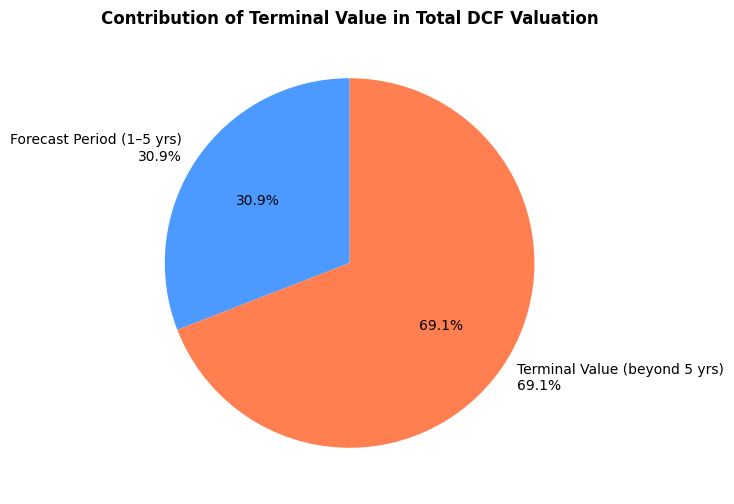

In [ ]:
# Calculate total and percentage contribution
pv_forecast_total = sum(pv_fcfs)
total_value = pv_forecast_total + pv_terminal

forecast_pct = (pv_forecast_total / total_value) * 100
terminal_pct = (pv_terminal / total_value) * 100

print(f"Present Value of Forecast Years: {pv_forecast_total:,.2f}")
print(f"Present Value of Terminal Value: {pv_terminal:,.2f}")
print(f"Total DCF Value: {total_value:,.2f}")
print(f"\n% Contribution - Forecast Period: {forecast_pct:.2f}% | Terminal Value: {terminal_pct:.2f}%")

# Visualization (Pie Chart)
labels = [f'Forecast Period (1–5 yrs)\n{forecast_pct:.1f}%',
          f'Terminal Value (beyond 5 yrs)\n{terminal_pct:.1f}%']
sizes = [pv_forecast_total, pv_terminal]
colors = ['#4C9AFF', '#FF7F50']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, textprops={'fontsize': 10})
plt.title('Contribution of Terminal Value in Total DCF Valuation', fontsize=12, weight='bold')
plt.show()

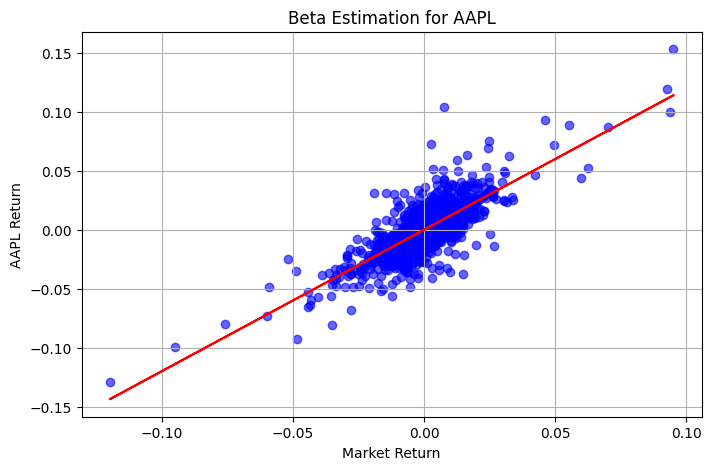

In [ ]:
plt.figure(figsize=(8,5))                          # → Set figure size for clarity
plt.scatter(returns['Market'], returns['Stock'], alpha=0.6, color='blue')   # → Plot stock vs market returns as scatter points
m, b = np.polyfit(returns['Market'], returns['Stock'], 1)  # → Fit regression line (slope = Beta)
plt.plot(returns['Market'], m * returns['Market'] + b, color='red')   # → Plot the regression line
plt.title(f"Beta Estimation for {stock}")          # → Set chart title
plt.xlabel("Market Return")                        # → Label X-axis
plt.ylabel(f"{stock} Return")                      # → Label Y-axis
plt.grid(True)                                     # → Add grid lines for better readability
plt.show()                                         # → Display the plot

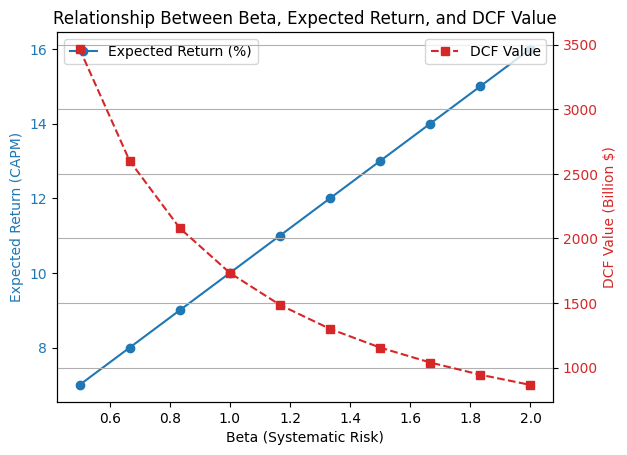

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Assume data
beta_values = np.linspace(0.5, 2.0, 10)  # Range of Beta values
risk_free_rate = 0.04
market_return = 0.10

# Step 2: Calculate expected returns using CAPM
expected_returns = risk_free_rate + beta_values * (market_return - risk_free_rate)

# Step 3: Assume constant Free Cash Flow and growth
fcf = 100  # arbitrary free cash flow in billion $
growth_rate = 0.04

# Step 4: Calculate DCF value for each discount rate (expected return)
dcf_values = fcf * (1 + growth_rate) / (expected_returns - growth_rate)

# Step 5: Plot
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Beta (Systematic Risk)')
ax1.set_ylabel('Expected Return (CAPM)', color=color)
ax1.plot(beta_values, expected_returns * 100, 'o-', color=color, label='Expected Return (%)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # Second y-axis
color = 'tab:red'
ax2.set_ylabel('DCF Value (Billion $)', color=color)
ax2.plot(beta_values, dcf_values, 's--', color=color, label='DCF Value')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Relationship Between Beta, Expected Return, and DCF Value')
plt.grid(True)
plt.show()
